<a href="https://colab.research.google.com/github/Gustavens/Google-colab-AI/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.8240 - loss: 0.5673 - val_accuracy: 0.9592 - val_loss: 0.1350
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.9466 - loss: 0.1744 - val_accuracy: 0.9693 - val_loss: 0.0999
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9617 - loss: 0.1267 - val_accuracy: 0.9702 - val_loss: 0.0930
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9678 - loss: 0.1074 - val_accuracy: 0.9732 - val_loss: 0.0909
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9719 - loss: 0.0900 - val_accuracy: 0.9742 - val_loss: 0.0822
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9708 - loss: 0.0940
Precisión en el conjunto de prueba: 97.42%


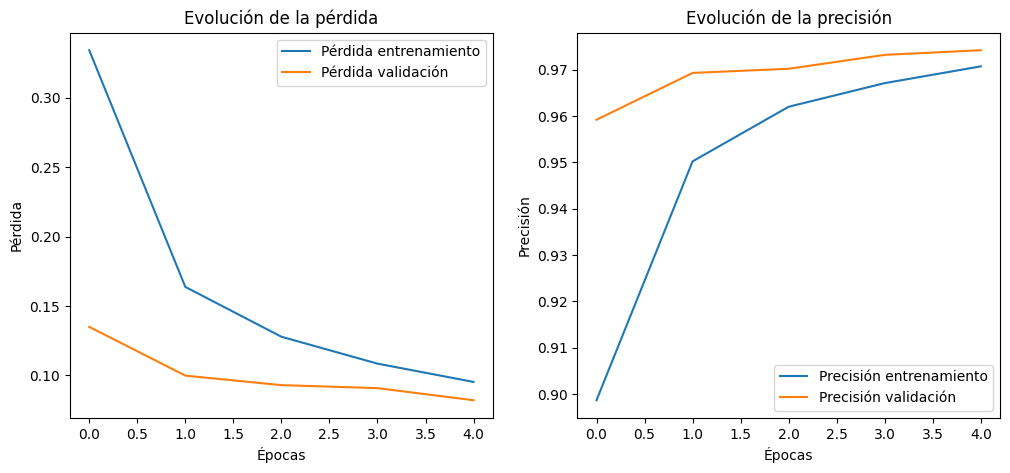

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


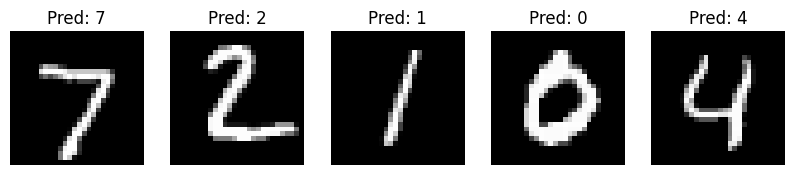

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, x_test = x_train/255.0,  x_test/255.0

x_train =x_train.reshape(-1,784) #Entrada
x_test = x_test.reshape(-1, 784)

model = keras.models.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(784,)),#1er capa oculta
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation='relu'),#2da capa oculta
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax') #capa de salida
]
)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

loss, accuracy = model.evaluate(x_test, y_test)
print(f"Precisión en el conjunto de prueba: {accuracy * 100:.2f}%")

# Graficar la evolución de la pérdida y precisión durante el entrenamiento
plt.figure(figsize=(12, 5))

# Gráfico de la pérdida
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Pérdida entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Evolución de la pérdida')

# Gráfico de la precisión
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Precisión entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.title('Evolución de la precisión')

plt.show()

# Mostrar algunas predicciones
predictions = model.predict(x_test)
fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for i, ax in enumerate(axes):
    ax.imshow(x_test[i].reshape(28, 28), cmap='gray')
    ax.set_title(f"Pred: {np.argmax(predictions[i])}")
    ax.axis('off')
plt.show()

